# regrid SW radiation data

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xesmf as xe

In [13]:
ds=xr.open_dataset('dswrf.sfc.mon.mean.nc')

In [14]:
ds

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, time: 529, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-01-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    dswrf      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

In [15]:
# to regrid to 3 x 3 grid

In [16]:
# create an empty dataset with new coordinates
ds_out = xr.Dataset(
    {
        "lat": (["lat"], np.arange(-88.5, 90, 3.0)),
        "lon": (["lon"], np.arange(-178.5, 180, 3.0)),
    }
)

In [17]:
# create a regridder
regridder = xe.Regridder(ds, ds_out, "bilinear", periodic=True)
regridder

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_94x192_60x120_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (94, 192) 
Output grid shape:          (60, 120) 
Periodic in longitude?      True

In [18]:
# now, apply the regridder
ds_out=regridder(ds)

In [19]:
ds_out

<xarray.Dataset>
Dimensions:  (time: 529, lat: 60, lon: 120)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-01-01
  * lat      (lat) float64 -88.5 -85.5 -82.5 -79.5 -76.5 ... 79.5 82.5 85.5 88.5
  * lon      (lon) float64 -178.5 -175.5 -172.5 -169.5 ... 172.5 175.5 178.5
Data variables:
    dswrf    (time, lat, lon) float32 391.0 390.7 390.5 390.4 ... 0.0 0.0 0.0
Attributes:
    regrid_method:  bilinear

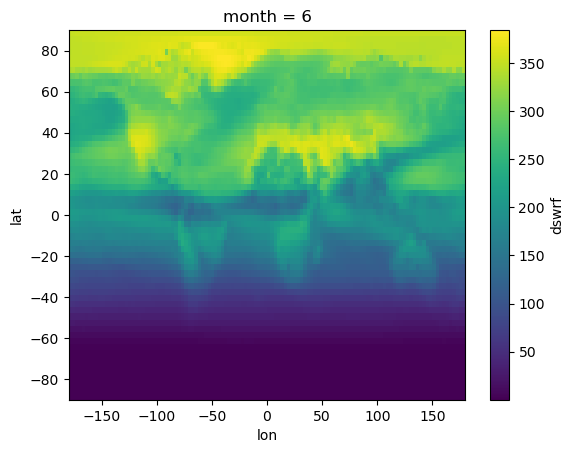

In [20]:
# calculate climatology
swc = ds_out.dswrf.groupby('time.month').mean('time')
swc.sel(month=6).plot()

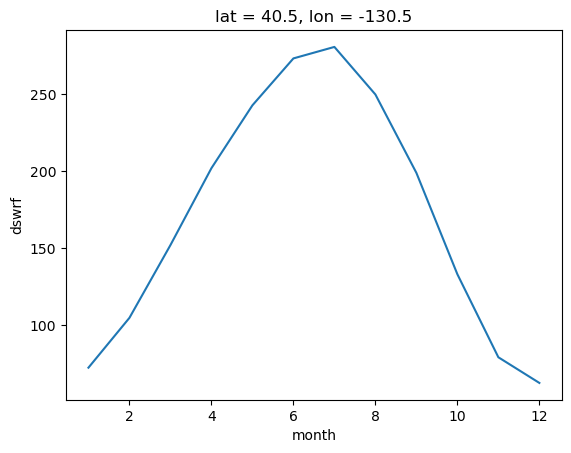

In [21]:
swc.sel(lat=40,method='nearest').sel(lon=-130,method='nearest').plot()

In [22]:
# writing a netCDF file
ds_write = swc.to_dataset()
ds_write.to_netcdf('SWrad_NCEP2_3x3_climatology.nc')